In [6]:
import pandas as pd

In [5]:
from google.colab import files
uploaded = files.upload()

Saving car data.csv to car data (1).csv


In [7]:
df = pd.read_csv('car data.csv')
df.head(309)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [10]:
df.shape

(301, 9)

In [11]:
print(df['Seller_Type'].unique())

['Dealer' 'Individual']


In [12]:
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Manual' 'Automatic']
[0 1 3]


In [13]:
df.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [15]:
df.isnull().values.any()

np.False_

In [16]:
df.isnull().sum().sum()


np.int64(0)

In [17]:
import seaborn as sns

In [18]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [19]:
df.corr(numeric_only=True)


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [20]:
df.dtypes


,0
Car_Name,object
Year,int64
Selling_Price,float64
Present_Price,float64
Kms_Driven,int64
Fuel_Type,object
Seller_Type,object
Transmission,object
Owner,int64


<Axes: >

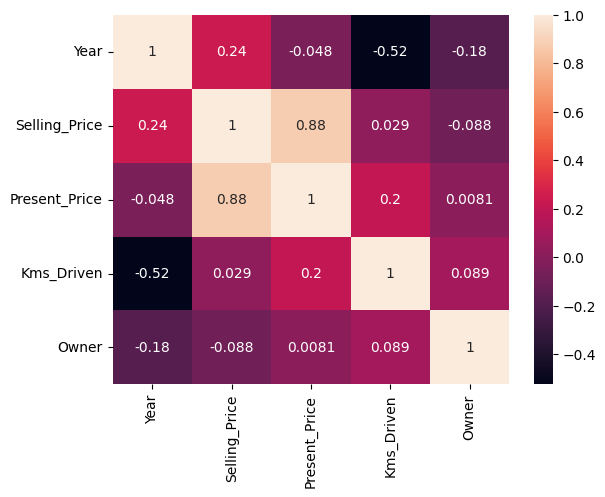

In [21]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

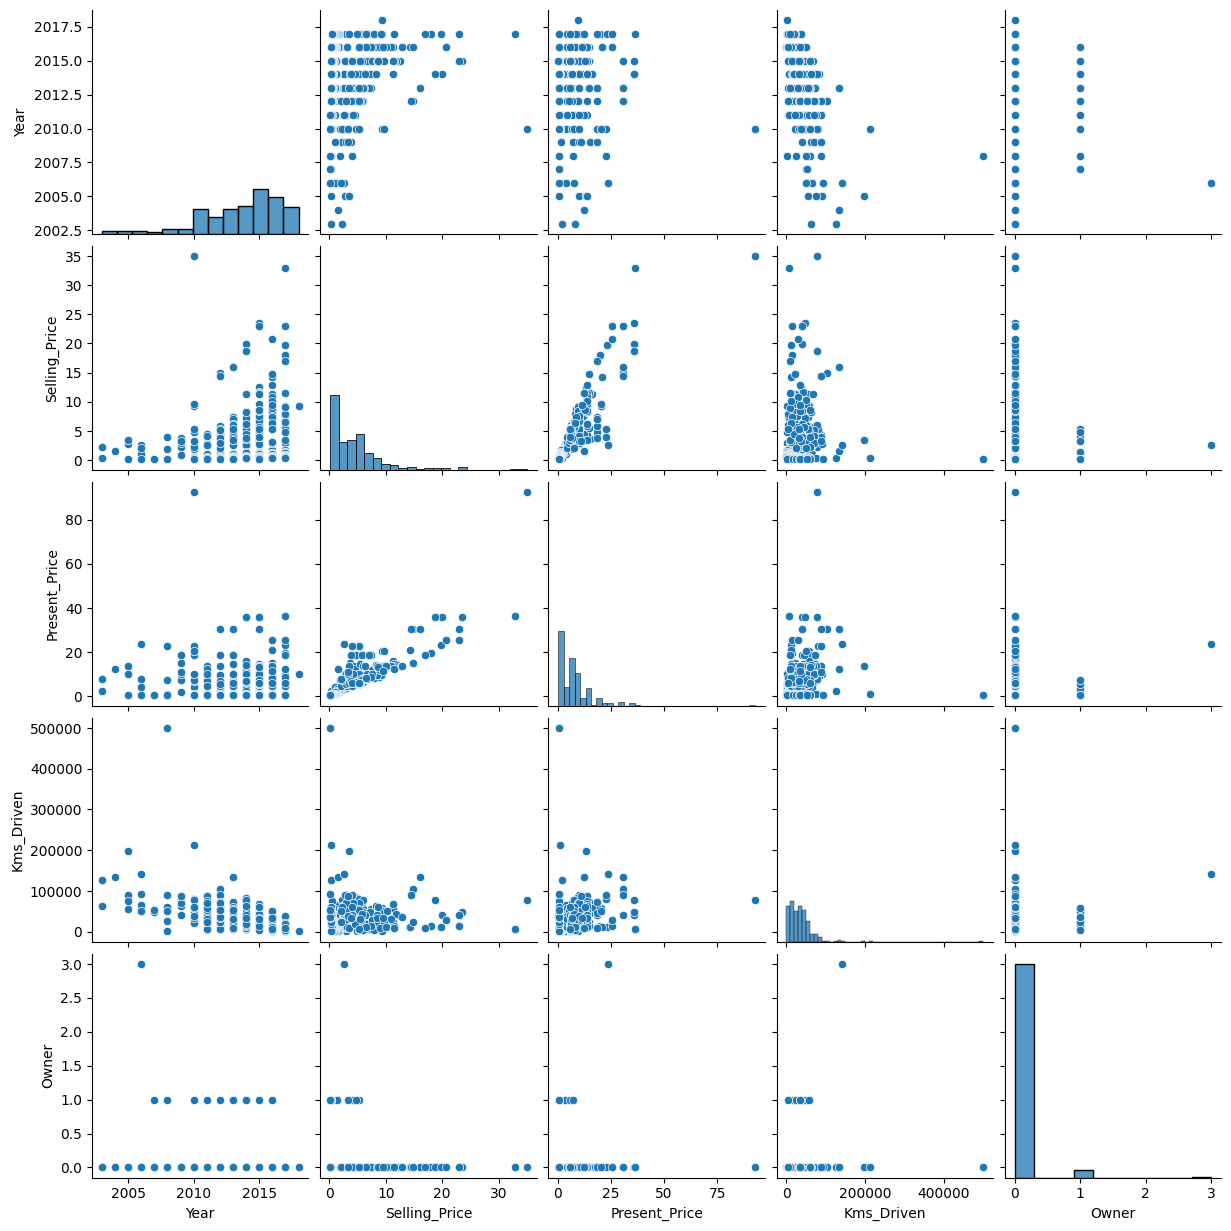

In [22]:
sns.pairplot(df)

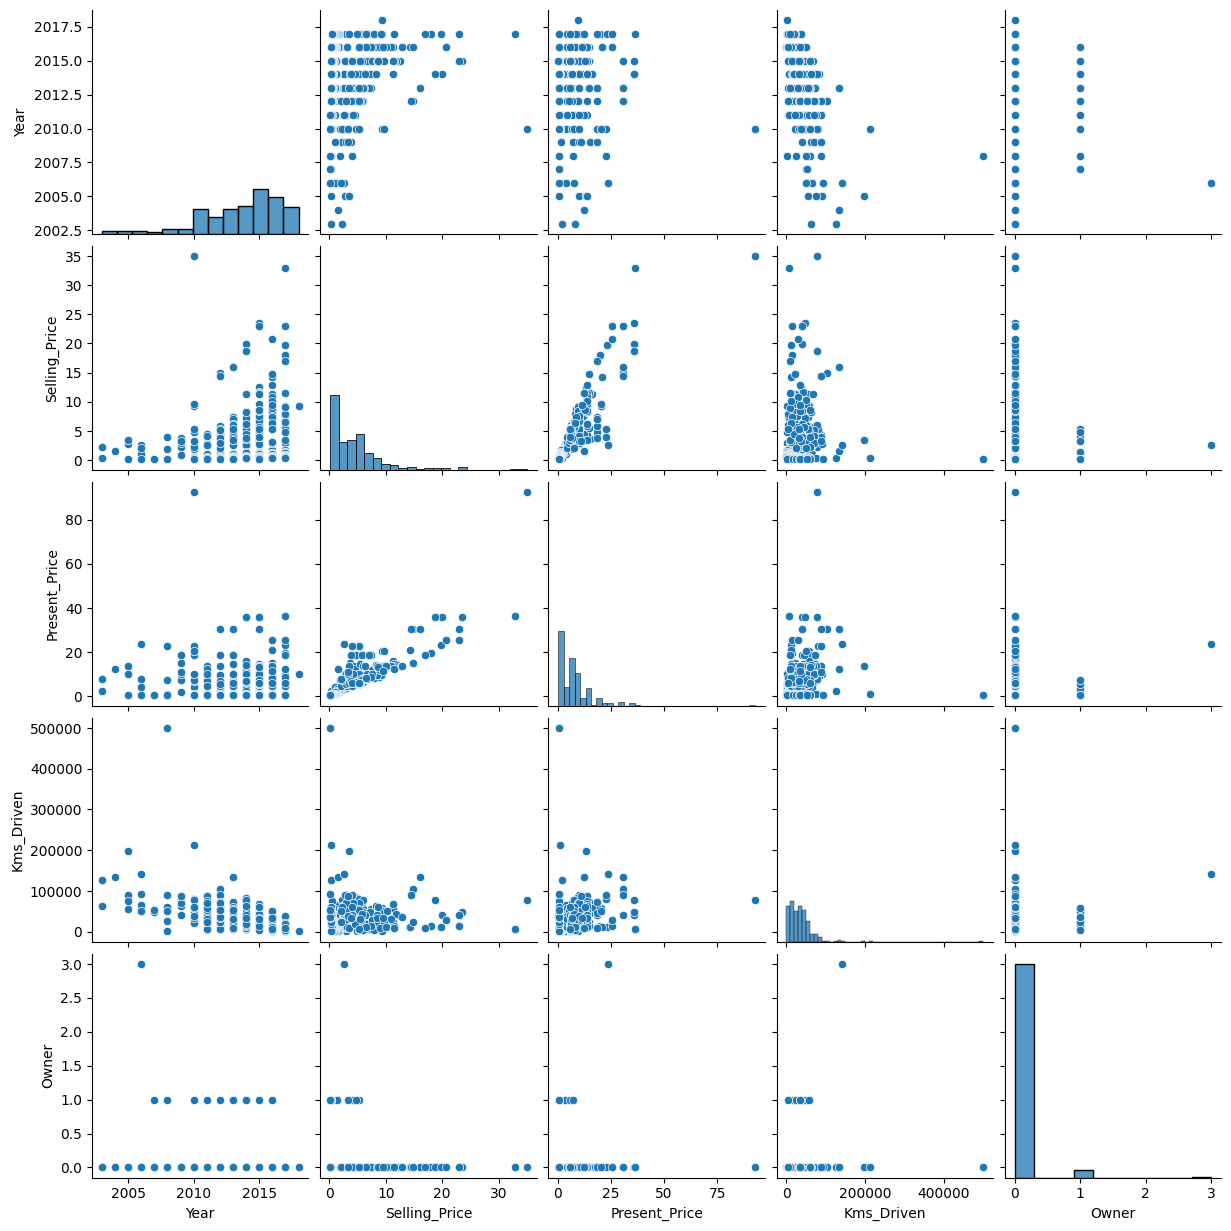

In [23]:
sns.pairplot(df.select_dtypes(include='number'))


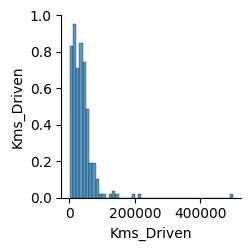

In [30]:
sns.pairplot(df[['Kms_Driven']])


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
corrmat = df.corr(numeric_only=True)
top_corr_f = corrmat.index
plt.figure(figsize=(20,20))


<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

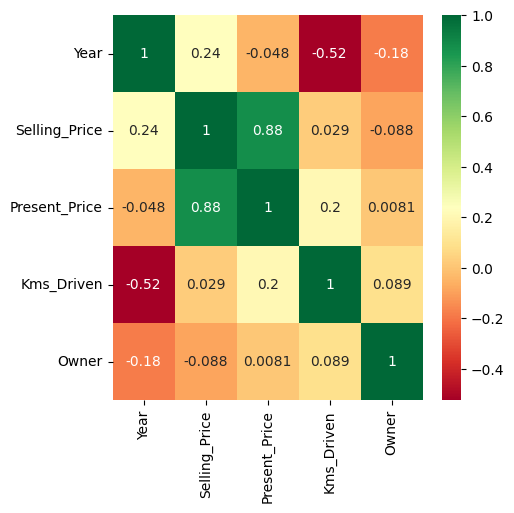

In [42]:
plt.figure(figsize=(5, 5))
sns.heatmap(corrmat, annot=True, cmap='RdYlGn')
plt.show()

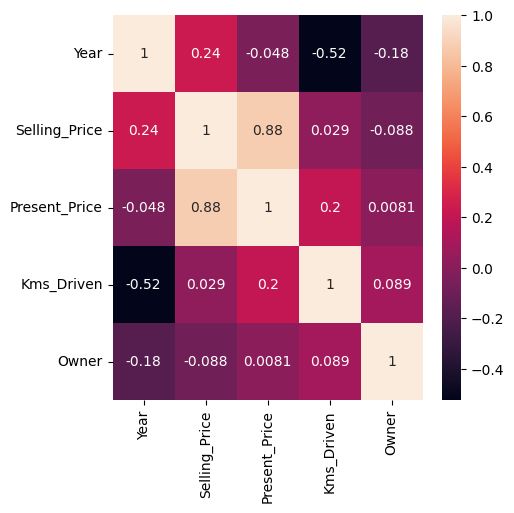

In [60]:
corrmat = df.corr(numeric_only=True)

plt.figure(figsize=(5, 5))
sns.heatmap(corrmat, annot=True)
plt.show()


In [52]:
x=df.iloc[:,3:]
y=df.iloc[:,2]

In [59]:
x.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5.59,27000,Petrol,Dealer,Manual,0
1,9.54,43000,Diesel,Dealer,Manual,0
2,9.85,6900,Petrol,Dealer,Manual,0
3,4.15,5200,Petrol,Dealer,Manual,0
4,6.87,42450,Diesel,Dealer,Manual,0


In [58]:
y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [69]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [72]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(x, y)


ExtraTreesRegressor(n_estimators=200, random_state=42)

In [70]:
print(model.feature_importances_)


[0.38963004 0.09896254 0.00090061 0.23347248 0.01139018 0.1250001
 0.14064404]


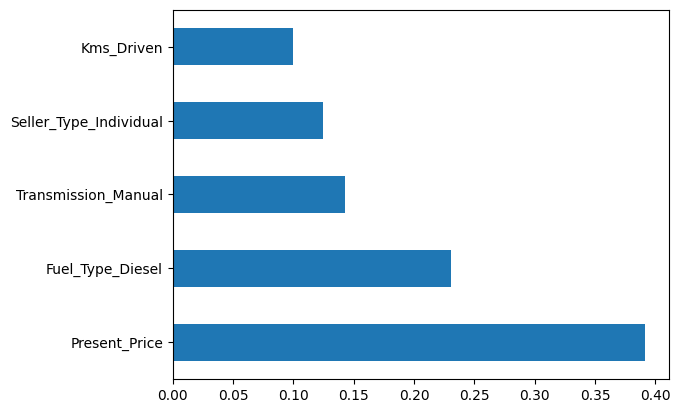

In [76]:
feat= pd.Series(model.feature_importances_,index=x.columns)
feat.nlargest(5).plot(kind='barh')
plt.show()

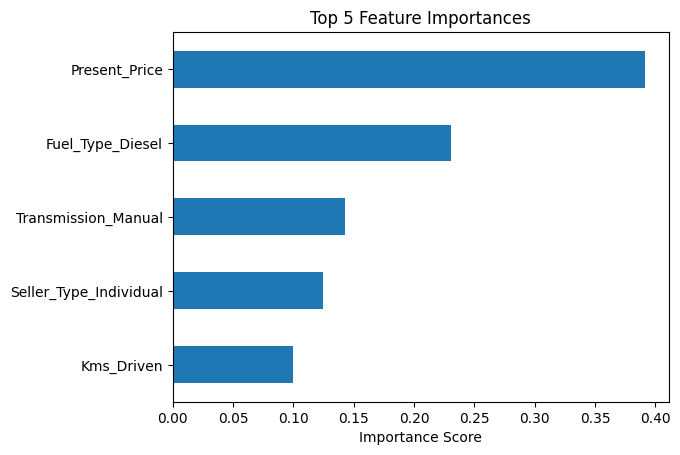

In [74]:
import matplotlib.pyplot as plt

feat.nlargest(5).sort_values().plot(kind='barh')
plt.title("Top 5 Feature Importances")
plt.xlabel("Importance Score")
plt.show()


In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [78]:
x_train

,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
124,1.75,11500,0,False,True,True,True
176,1.05,30000,0,False,True,True,True
82,25.39,15000,0,True,False,False,False
108,1.50,18000,0,False,True,True,True
269,10.00,18828,0,False,True,False,True
...,...,...,...,...,...,...,...
284,5.90,9800,0,False,True,False,True
286,7.90,28569,0,False,True,False,True
20,3.95,25000,0,False,True,False,True
270,10.00,69341,0,False,True,False,True


In [80]:
x_train.shape

(240, 7)

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [99]:
import numpy as np
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [105]:
n_estimators=[int (x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features=['sqrt', 'log2', None]
max_depth=[int(x) for x in np.linspace(5,30, num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [106]:
from sklearn.model_selection import RandomizedSearchCV

In [107]:
random_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['sqrt', 'log2', None], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [108]:
rf=RandomForestRegressor()

In [109]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [110]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [111]:
predictions=rf_random.predict(x_test)

In [112]:
predictions

array([ 5.20231111,  4.69735   , 11.56876667,  7.0939    ,  3.08180499,
        4.30905444,  4.58638889,  1.47008333,  0.57528333,  3.75672146,
        0.67488361,  8.55912778,  1.99493333, 20.89056667,  4.69658333,
        3.82081768,  6.72001667,  2.42163889,  2.97188634,  6.823125  ,
        5.40144444,  3.90266667,  9.86728333,  4.38081944,  0.4503    ,
        0.53973333,  7.18135   ,  7.47456667,  6.55988333,  0.22851667,
        0.39224583,  9.22576667,  1.12424028,  0.50756067,  8.02206806,
        6.29825   ,  4.35948495,  5.87706667,  5.27087083,  0.42587917,
        8.15686944,  6.05823333,  1.08555   ,  0.91781667, 10.02424167,
        4.98927778,  1.00571806,  3.03544633,  7.07404907,  0.61588175,
        0.50151151,  0.48178651,  0.22341667,  0.53043333,  4.13345865,
        0.46483333,  4.60996528,  2.49282917,  7.377375  ,  0.27313   ,
        4.30138515])

/tmp/ipython-input-2131792714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='Selling_Price', ylabel='Density'>

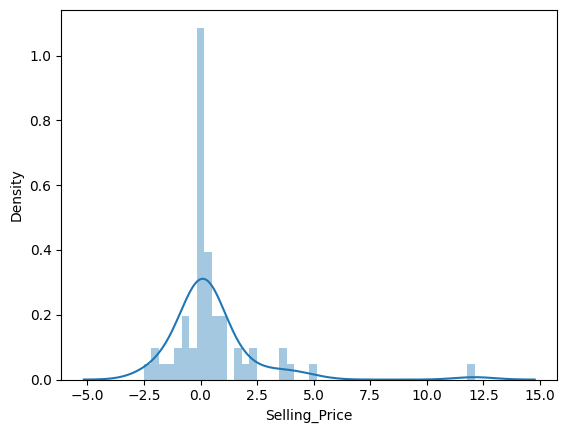

In [115]:
sns.distplot(y_test-predictions)

<Axes: xlabel='Selling_Price', ylabel='Count'>

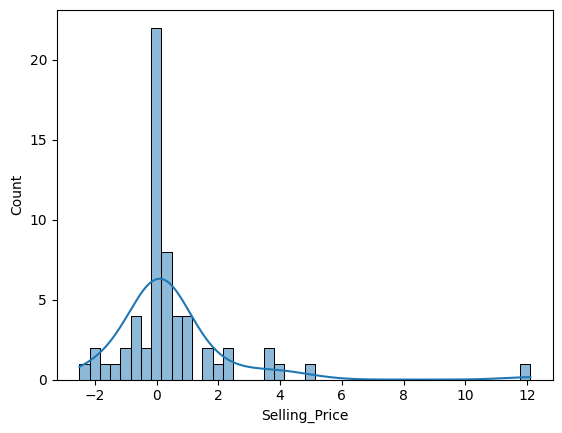

In [116]:
sns.histplot(y_test - predictions, kde=True)


<Axes: xlabel='Selling_Price', ylabel='Density'>

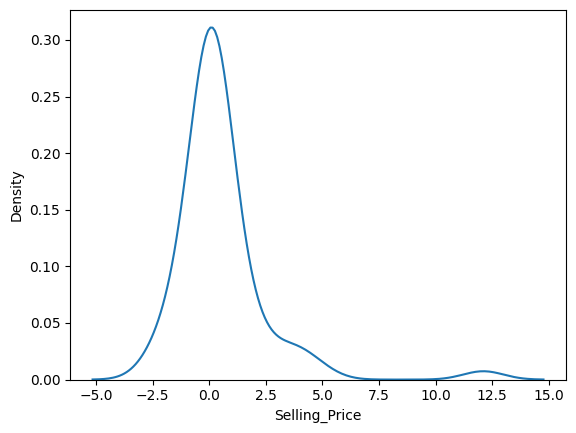

In [117]:
sns.kdeplot(y_test - predictions)


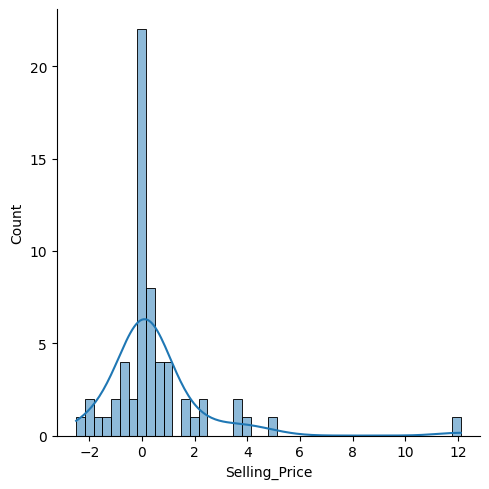

In [118]:
sns.displot(y_test - predictions, kde=True)


In [119]:
residuals = y_test - predictions


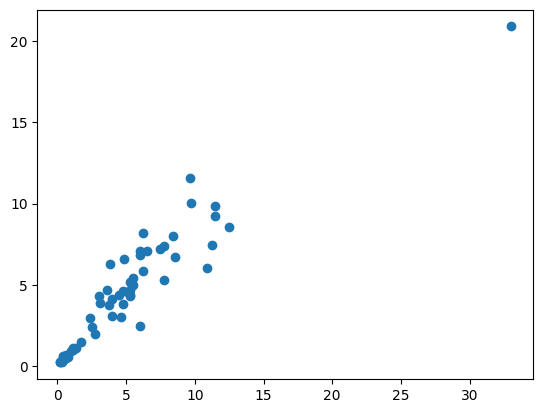

In [120]:
plt.scatter(y_test,predictions)

In [121]:
from sklearn import metrics

In [122]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.0282039891294192
MSE: 4.2682859738756145
RMSE: 2.0659830526593423


In [124]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)